In [1]:
import os
import re 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import manifold
from unionfind import unionfind
from sklearn.cluster import KMeans,OPTICS,DBSCAN
import sklearn
import matplotlib.cm as cm
import torch
import nibabel as nib
import scipy as sc

In [101]:
import sys
print(sys.path)

['/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/code/notebooks', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/env/lib/python3.8/site-packages']


In [102]:
preproc = "pypreclin"
meta_file = "/neurospin/lbi/monkeyfmri/deepstim/database/ANESTHETIC_database/participants.tsv"
data_dir = "/neurospin/lbi/monkeyfmri/deepstim/database/ANESTHETIC_database/derivatives/{0}".format(preproc)
outdir = "/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/TimeSeries"

In [103]:
meta = pd.read_csv("/neurospin/lbi/monkeyfmri/deepstim/database/ANESTHETIC_database/participants.tsv", sep = "\t")

In [104]:
meta

sub       ses  run          cond
0    almira  20130830   14         awake
1    almira  20130830   16         awake
2    almira  20140314    5         awake
3    almira  20140314    6         awake
4      jade  20120824   10         awake
..      ...       ...  ...           ...
151    rana  20150717    9  sevoflurane4
152    rana  20160805    4  sevoflurane4
153    rana  20160805    5  sevoflurane4
154    rana  20160805    6  sevoflurane4
155    rana  20160909   14  sevoflurane4

[156 rows x 4 columns]

In [105]:
print(os.path)

<module 'posixpath' from '/usr/lib/python3.8/posixpath.py'>


In [106]:
# Load data
df = pd.read_csv(meta_file, sep="\t", dtype=str)
df = df.rename(
    columns={'monkey': 'sub', 'session': 'ses', 'condition': 'cond'})
print(df)
basename1 = "sub-{0}_ses-{1}_task-rest_space-mni_run-{2}_desc-smask_bold.nii"
basename2 = "sub-{0}_ses-{1}_run-{2}_confounds.par"
dataset = []


for index, row in df.iterrows():
    fmri_file = os.path.join(
        data_dir, "sub-{0}".format(row["sub"]), "ses-{0}".format(row["ses"]),
        "func", basename1.format(row["sub"], row["ses"], row["run"]))
    confounds_file = os.path.join(
        data_dir, "sub-{0}".format(row["sub"]), "ses-{0}".format(row["ses"]),
        "func", basename2.format(row["sub"], row["ses"], row["run"]))
    dataset.append((fmri_file, confounds_file))
print("nb runs: {0} / {1}".format(len(dataset), len(df)))

        sub       ses  run          cond
0    almira  20130830  014         awake
1    almira  20130830  016         awake
2    almira  20140314  005         awake
3    almira  20140314  006         awake
4      jade  20120824  010         awake
..      ...       ...  ...           ...
151    rana  20150717  009  sevoflurane4
152    rana  20160805  004  sevoflurane4
153    rana  20160805  005  sevoflurane4
154    rana  20160805  006  sevoflurane4
155    rana  20160909  014  sevoflurane4

[156 rows x 4 columns]
nb runs: 156 / 156


In [7]:
np.max(test_load)

2450.40478515625

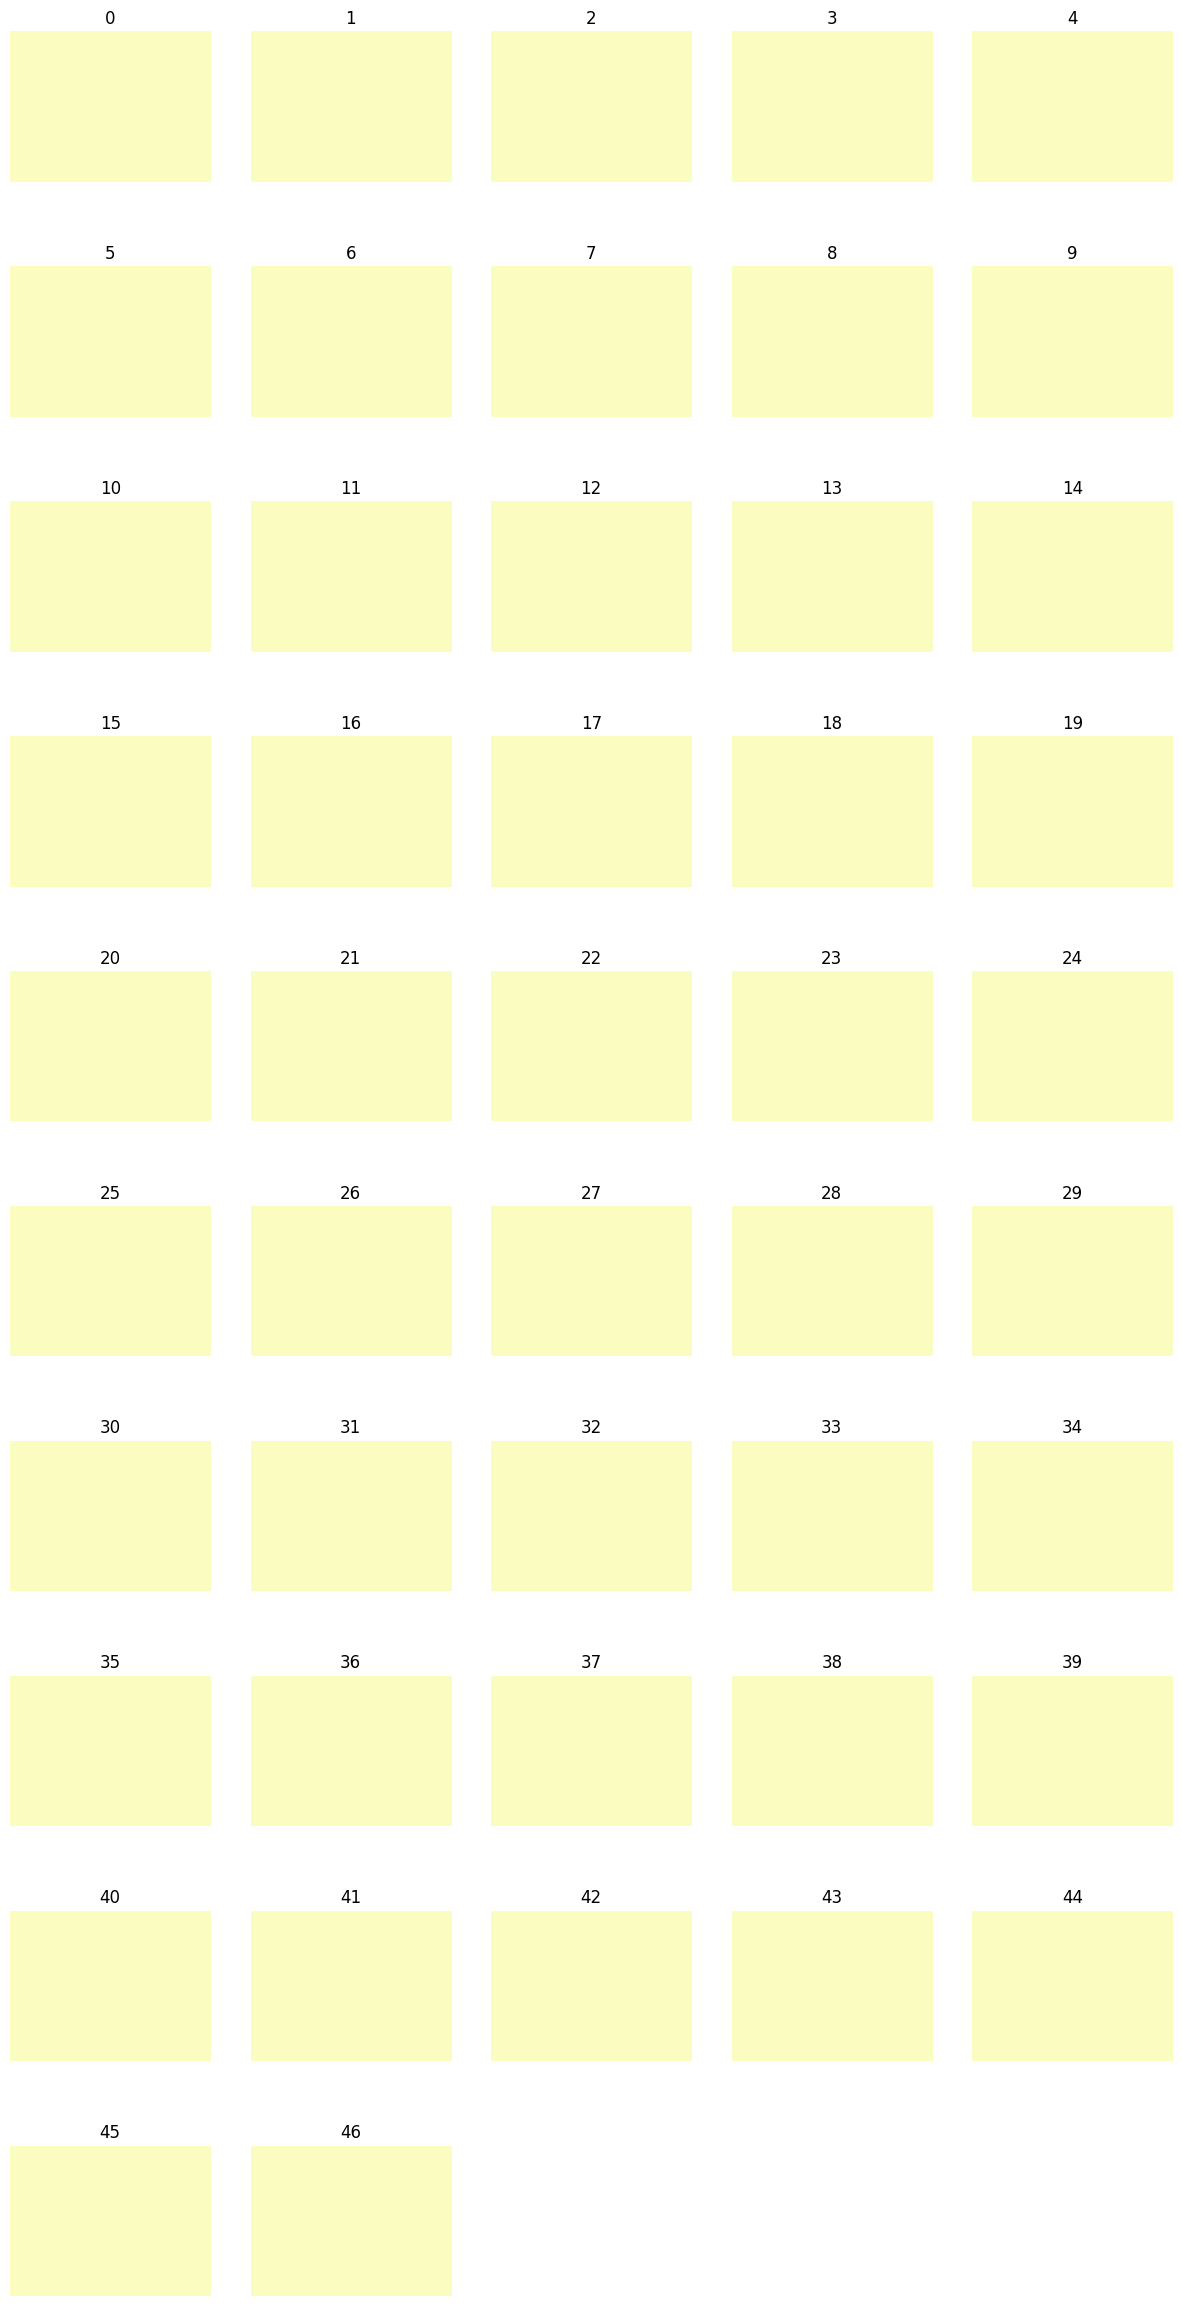

In [6]:
test_load = nib.load("/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/TimeSeries/sub-almira_ses-20130830_task-rest_space-mni_run-014_desc-smask_bold.nii.gz").get_fdata()
n = 47
rows = n // 5 + 1
columns = 5
fig = plt.figure(figsize=(15, rows * 3))

for i in range(n):
    fig.add_subplot(rows, columns, i+1)
    # showing image
    plt.imshow(test_load[:,:,i,350],cmap = "magma", vmin = -2, vmax = 2)
    plt.title(i)
    plt.axis('off')

In [ ]:
compteur = 0
for fmri_file,confound_file in dataset :
    if fmri_file == "/neurospin/lbi/monkeyfmri/deepstim/database/ANESTHETIC_database/derivatives/pypreclin/sub-rana/ses-20150626/func/sub-rana_ses-20150626_task-rest_space-mni_run-019_desc-smask_bold.nii":
        print(compteur)
    compteur += 1
    

129


In [ ]:
brain = np.zeros((60, 80, 47, 500))

for fmri_file,confound_file in dataset :
    print(fmri_file)
    try :
        accu = nib.load(fmri_file).get_fdata()
        brain += accu
    except : 
        pass

/neurospin/lbi/monkeyfmri/deepstim/database/ANESTHETIC_database/derivatives/pypreclin/sub-almira/ses-20130830/func/sub-almira_ses-20130830_task-rest_space-mni_run-014_desc-smask_bold.nii
/neurospin/lbi/monkeyfmri/deepstim/database/ANESTHETIC_database/derivatives/pypreclin/sub-almira/ses-20130830/func/sub-almira_ses-20130830_task-rest_space-mni_run-016_desc-smask_bold.nii
/neurospin/lbi/monkeyfmri/deepstim/database/ANESTHETIC_database/derivatives/pypreclin/sub-almira/ses-20140314/func/sub-almira_ses-20140314_task-rest_space-mni_run-005_desc-smask_bold.nii
/neurospin/lbi/monkeyfmri/deepstim/database/ANESTHETIC_database/derivatives/pypreclin/sub-almira/ses-20140314/func/sub-almira_ses-20140314_task-rest_space-mni_run-006_desc-smask_bold.nii
/neurospin/lbi/monkeyfmri/deepstim/database/ANESTHETIC_database/derivatives/pypreclin/sub-jade/ses-20120824/func/sub-jade_ses-20120824_task-rest_space-mni_run-010_desc-smask_bold.nii
/neurospin/lbi/monkeyfmri/deepstim/database/ANESTHETIC_database/deriv

In [ ]:
np.save("/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/Divers/brain.npy",arr = brain)

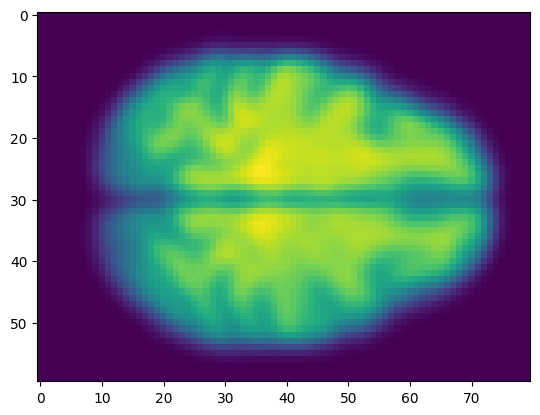

In [ ]:
plt.imshow(brain[:,:,33,300])

In [132]:
test_load = nib.load("/neurospin/lbi/monkeyfmri/images/reference/mni-resampled_1by1by1.nii").get_fdata()

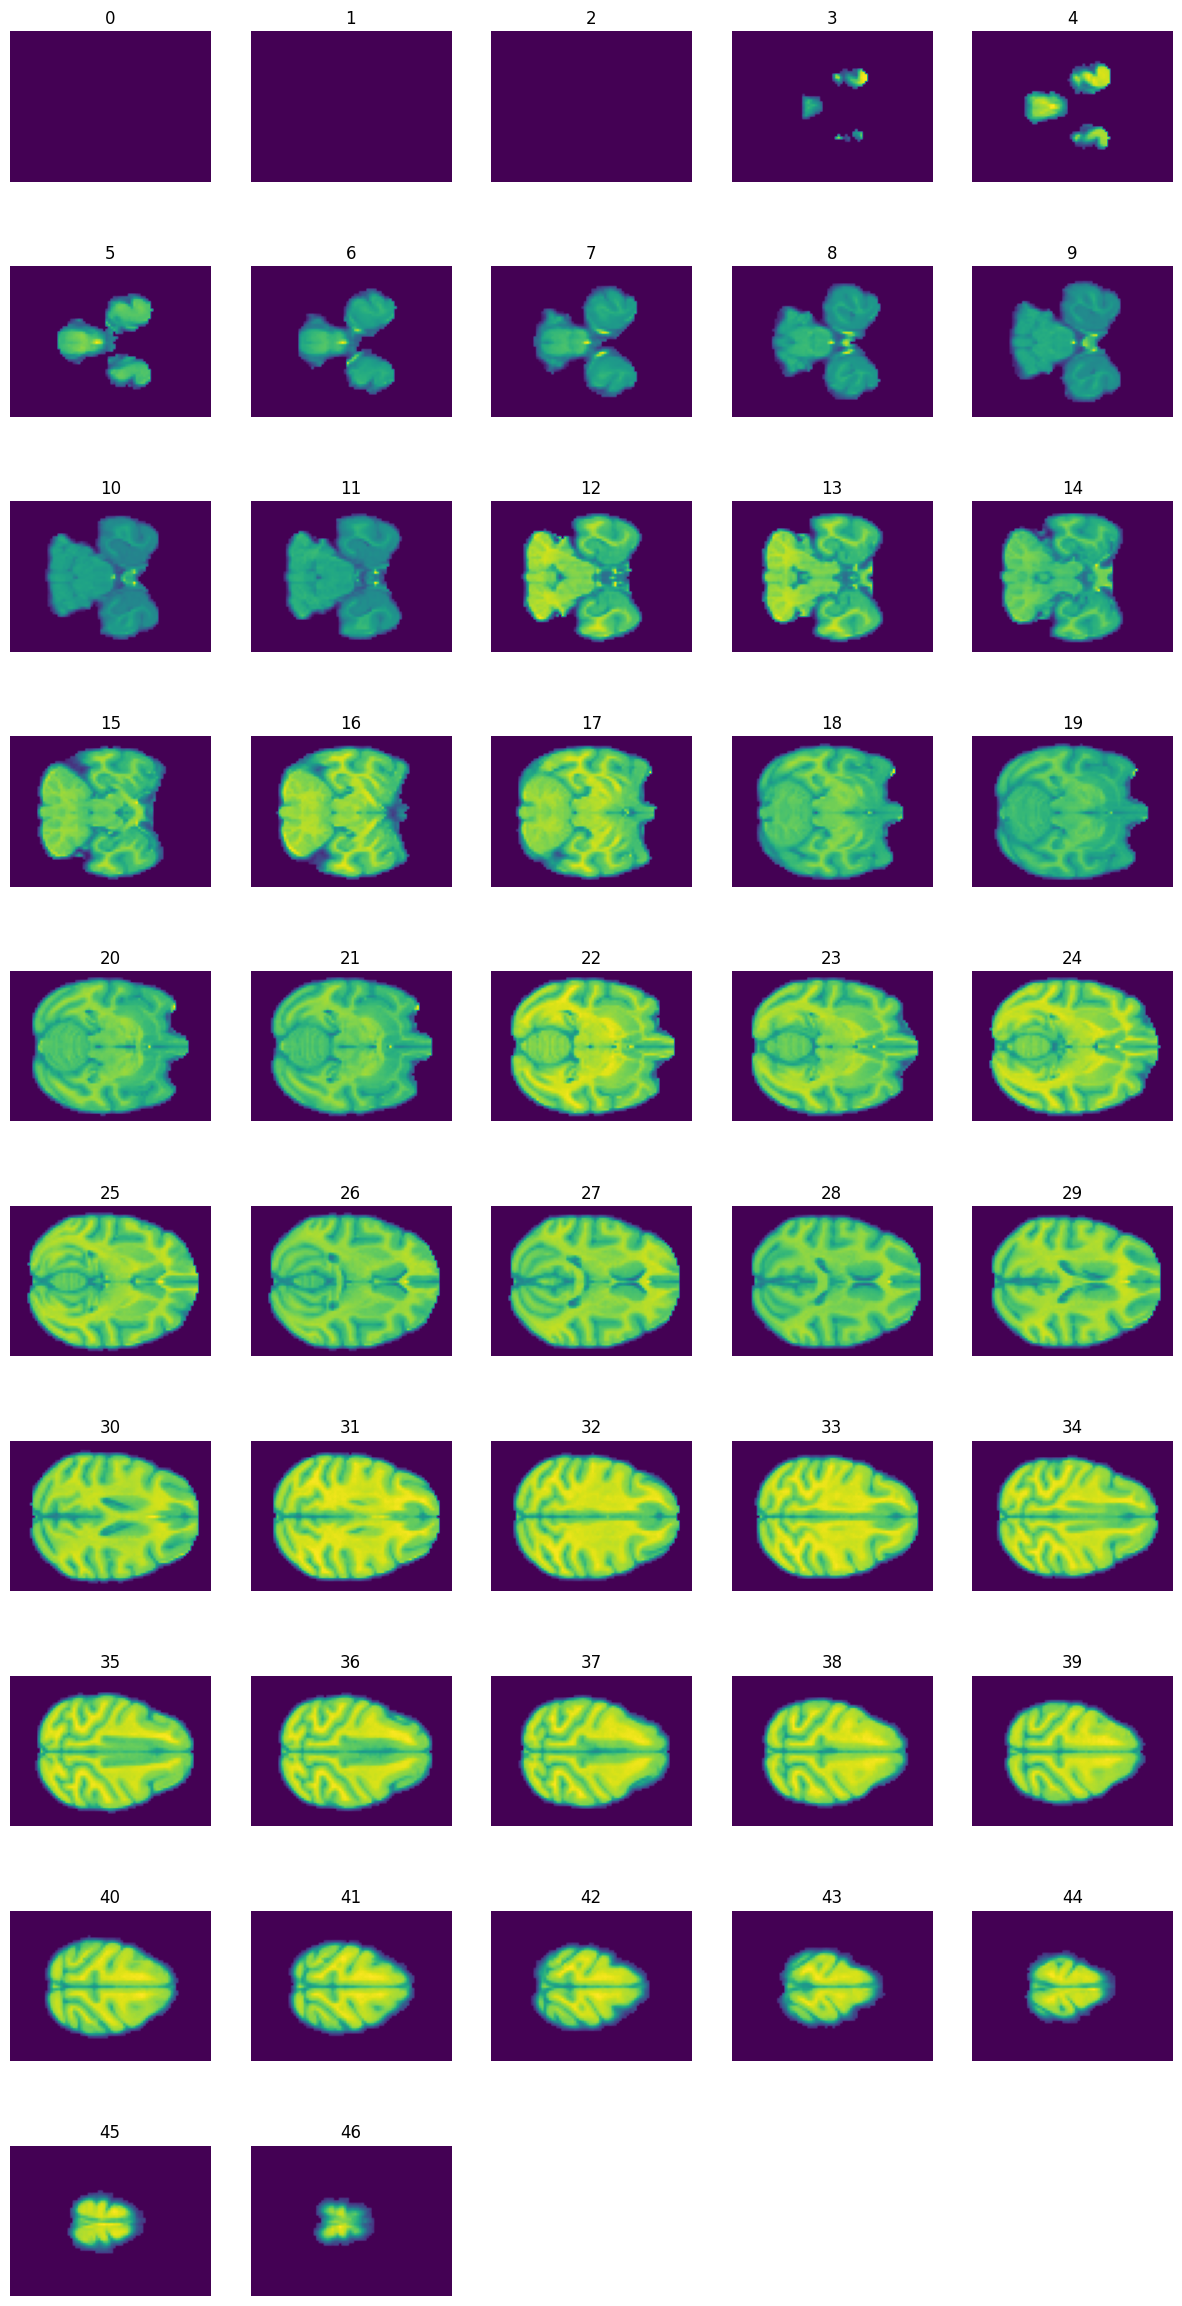

In [ ]:
n = 47
rows = n // 5 + 1
columns = 5
fig = plt.figure(figsize=(15, rows * 3))

for i in range(n):
    fig.add_subplot(rows, columns, i+1)
    # showing image
    plt.imshow(test_load[:,:,i])
    plt.title(i)
    plt.axis('off')

In [ ]:
slice = brain[:,:,30,:].reshape(-1,500)
corr = np.corrcoef(slice)

/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/env/lib/python3.8/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/env/lib/python3.8/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


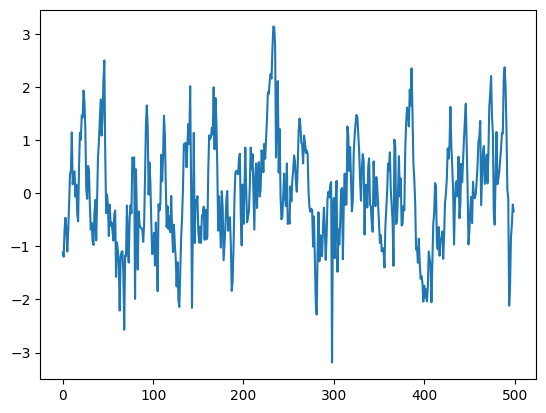

In [ ]:
plt.plot(sc.stats.zscore(test_load[25,25,33,:]))

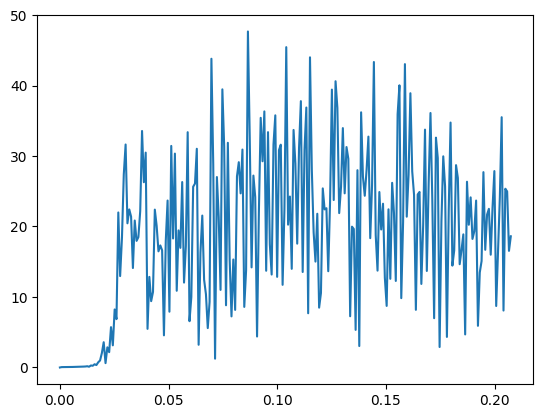

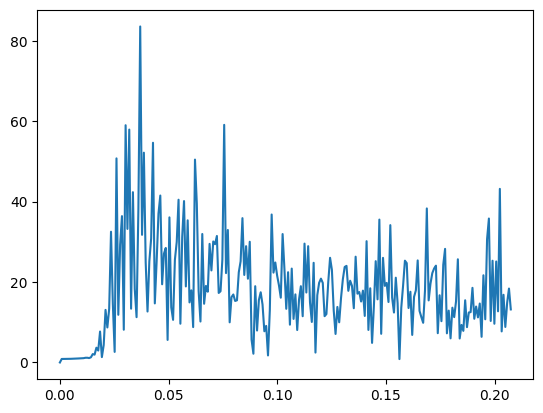

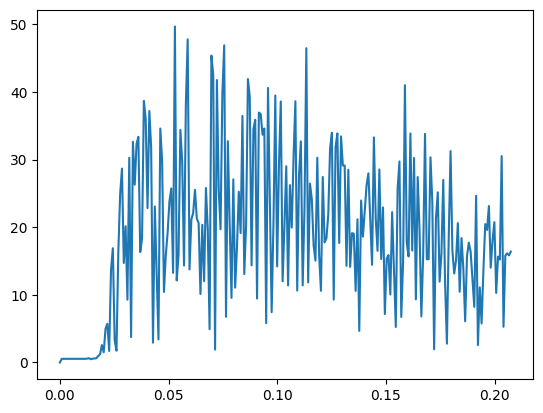

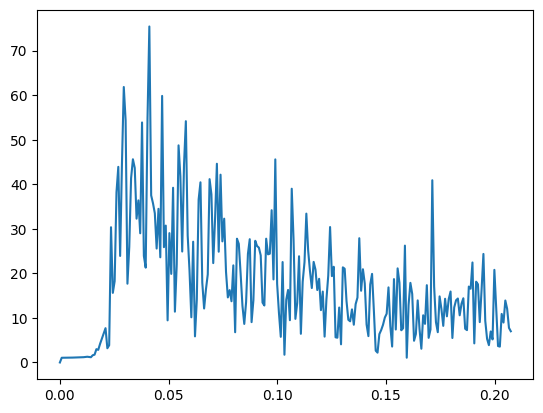

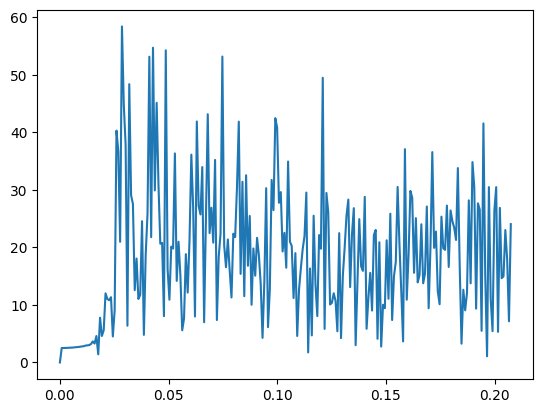

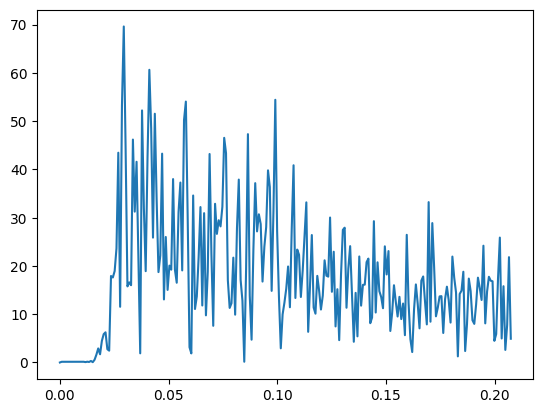

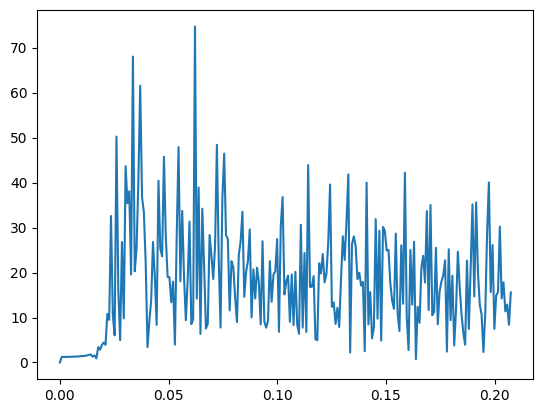

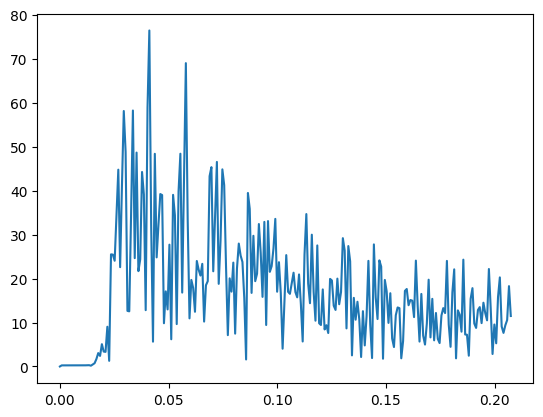

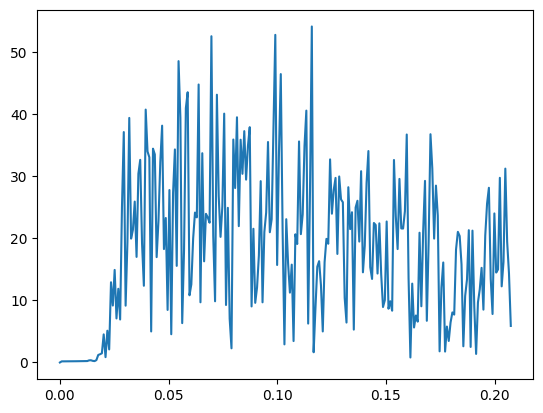

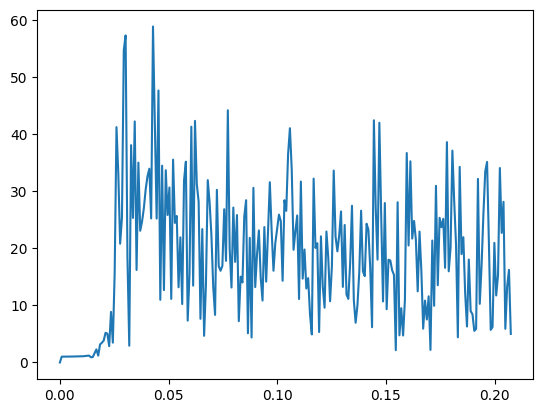

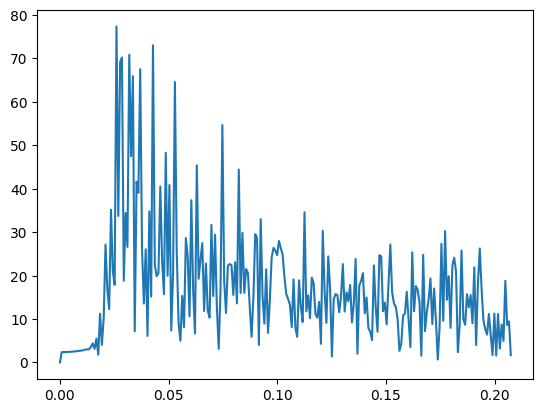

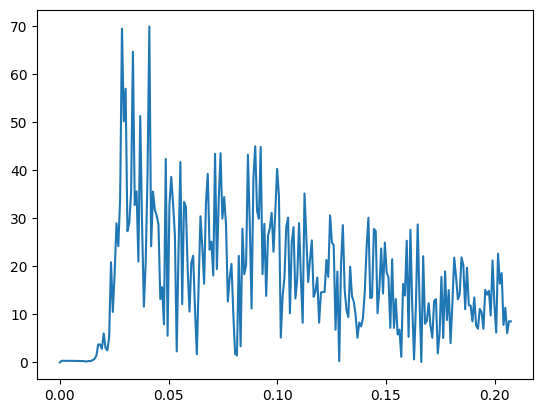

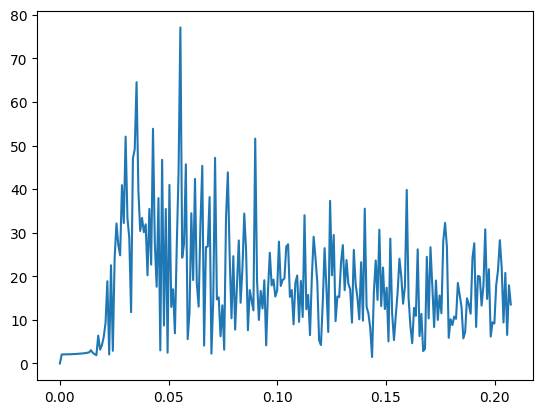

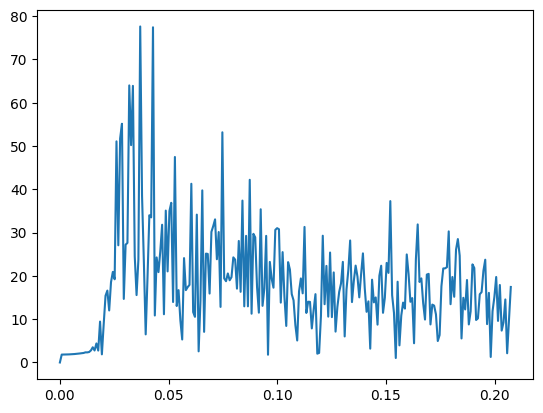

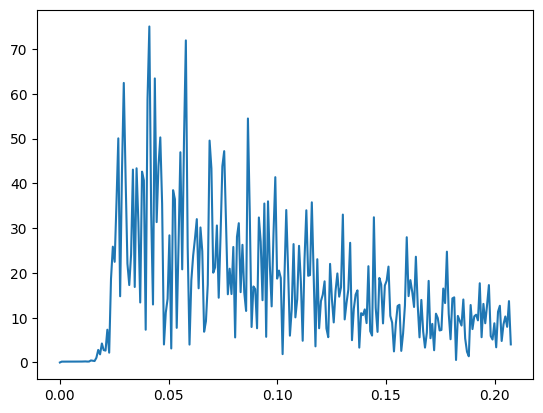

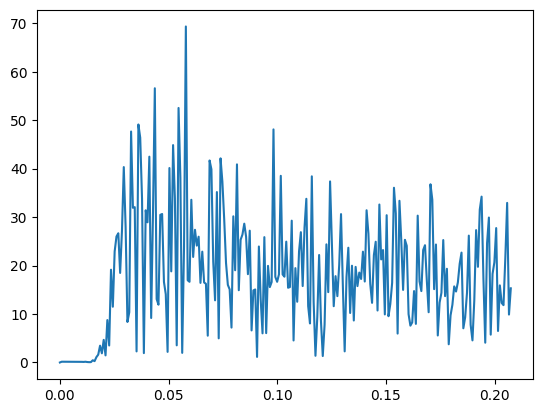

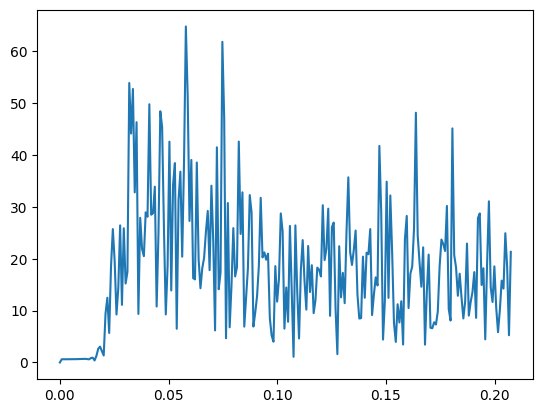

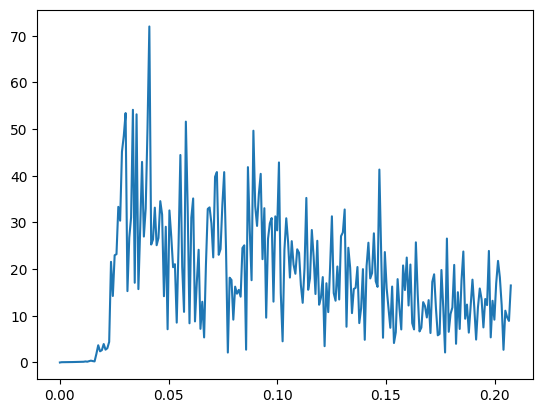

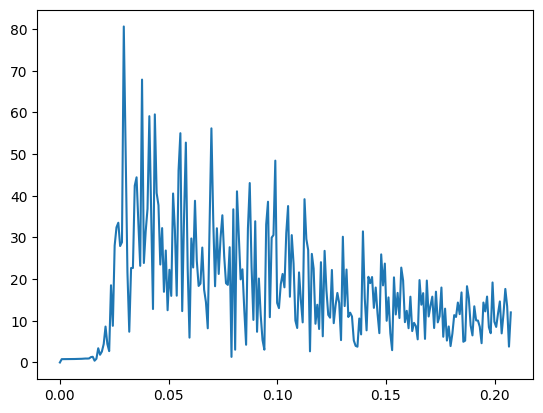

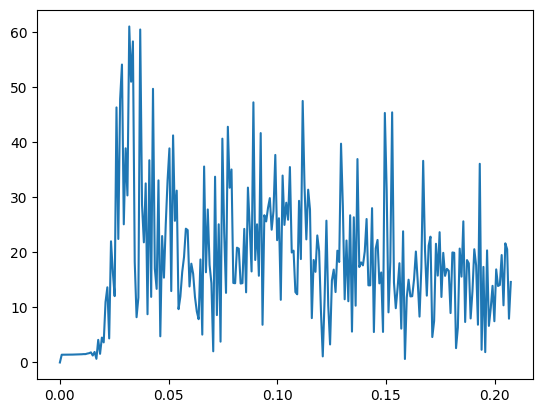

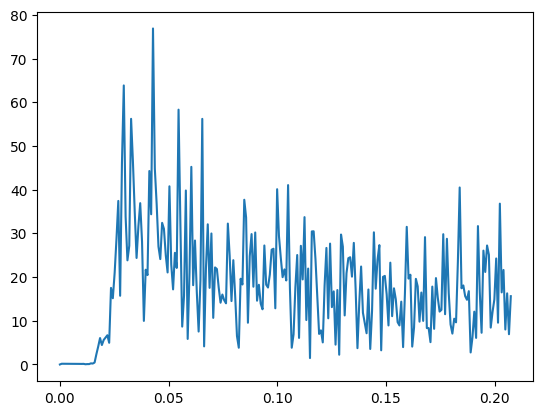

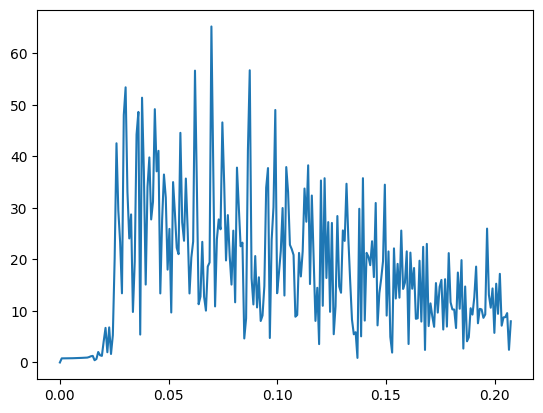

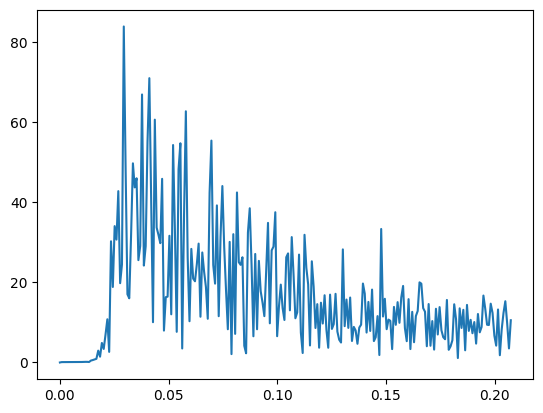

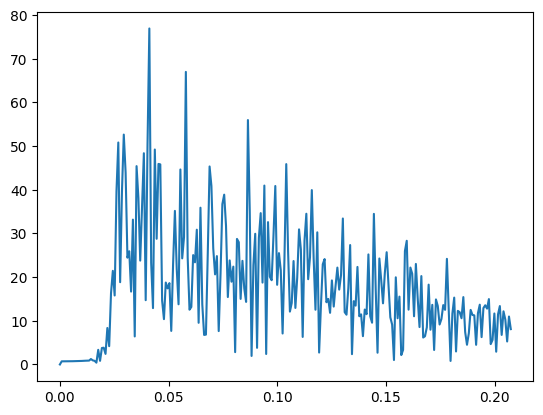

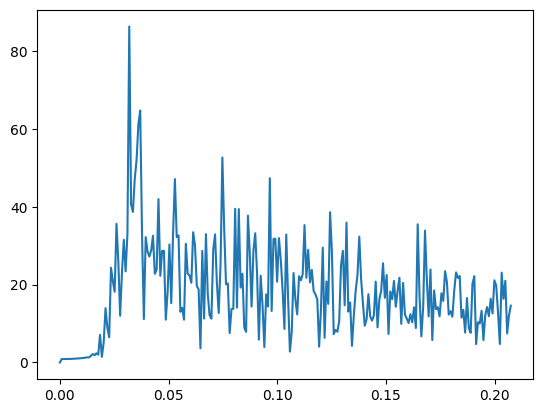

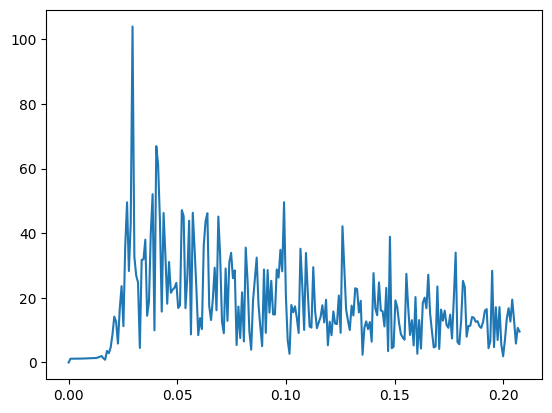

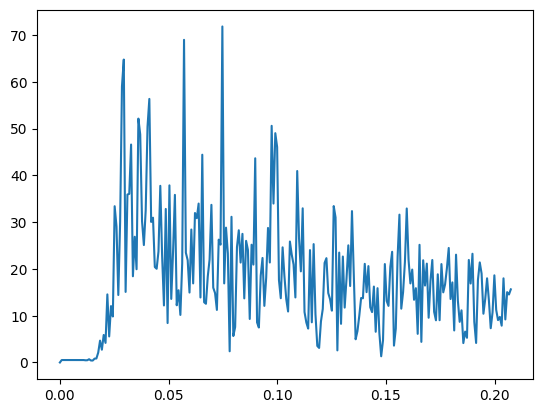

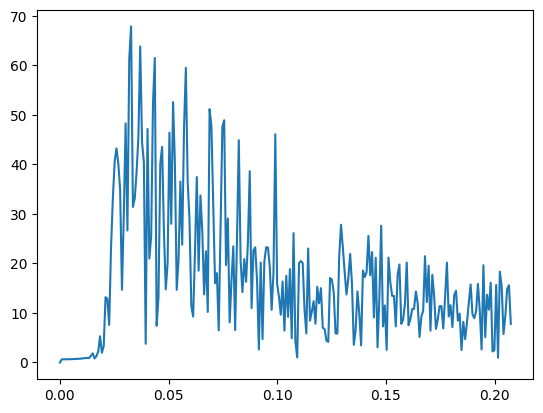

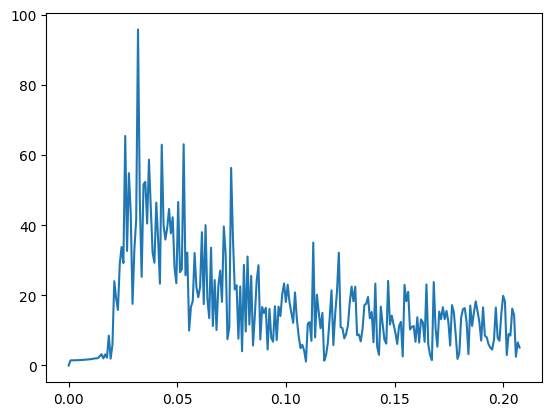

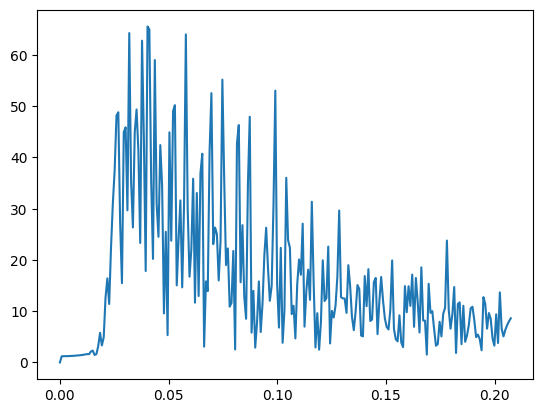

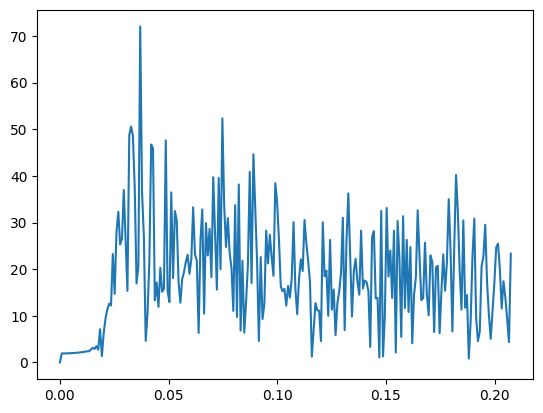

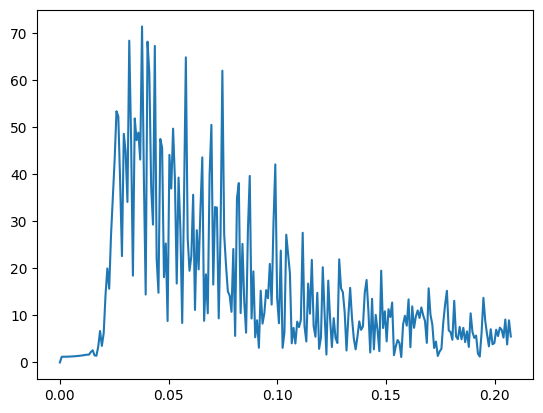

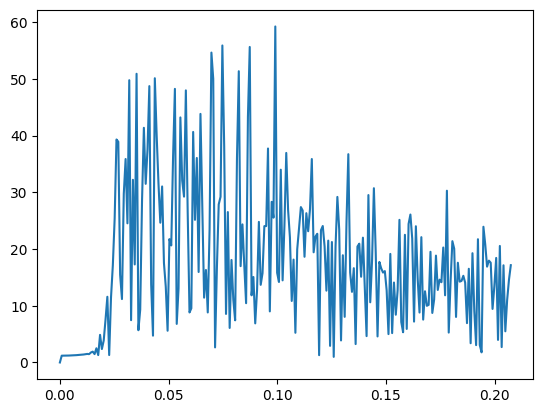

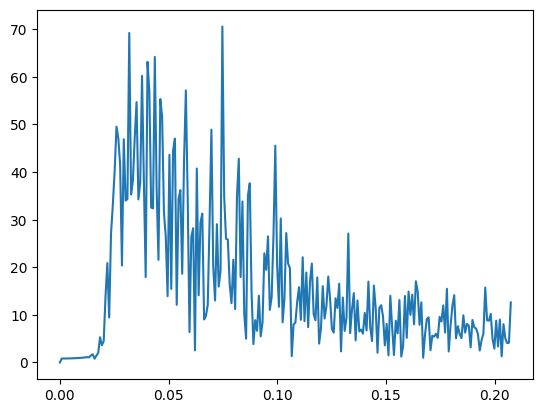

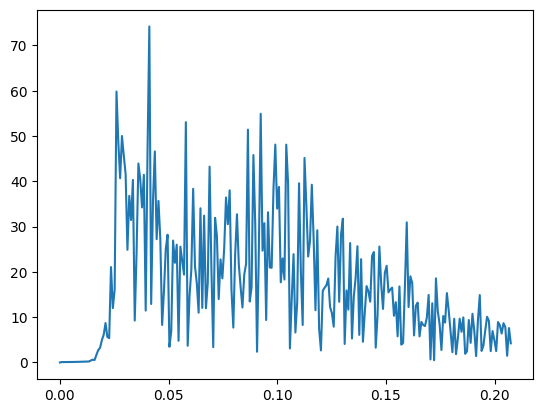

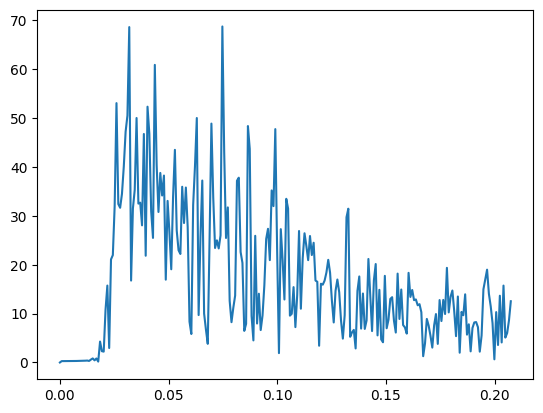

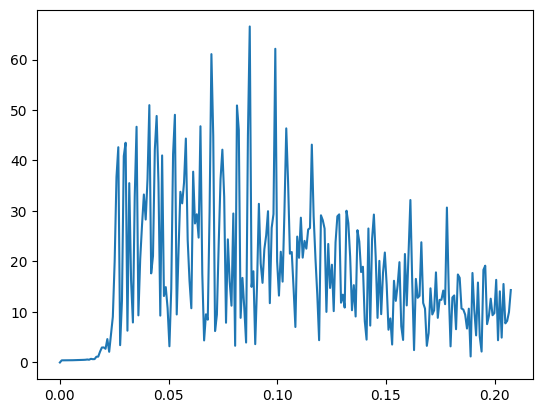

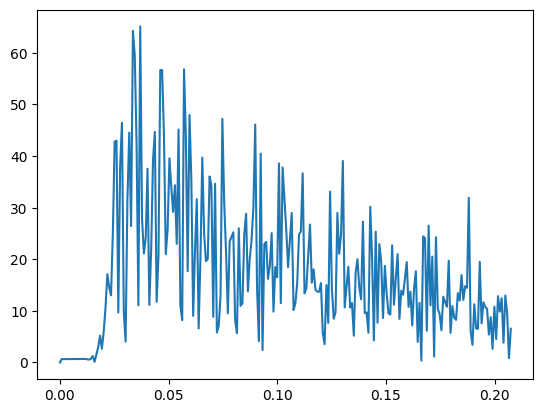

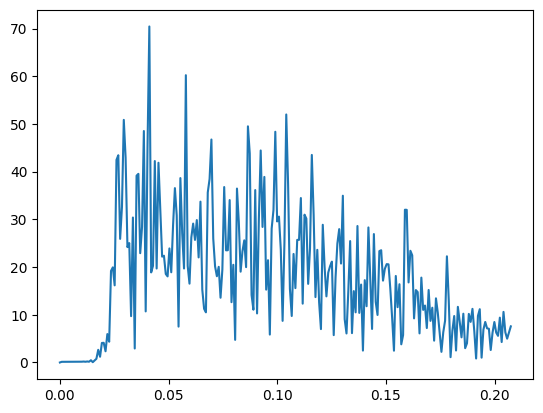

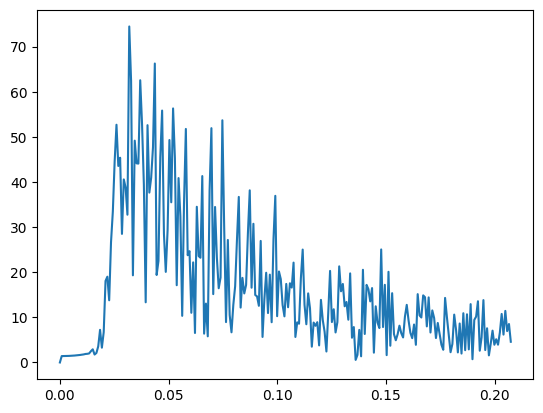

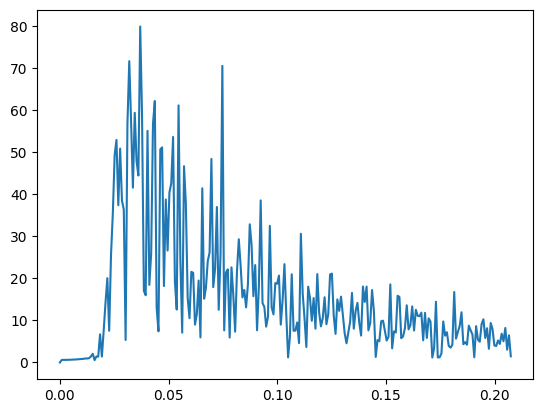

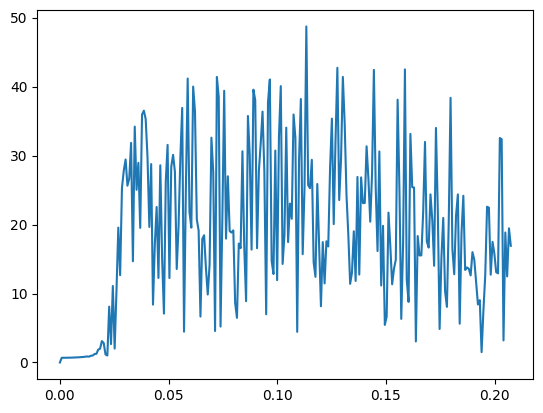

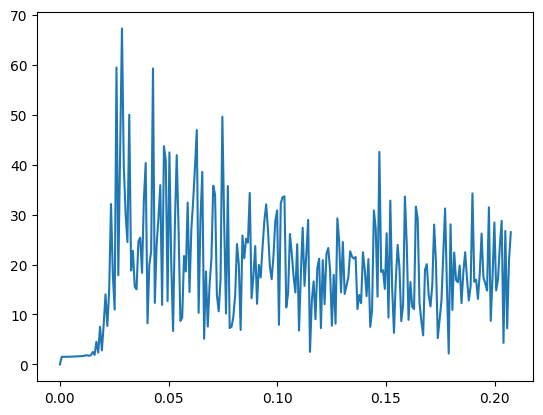

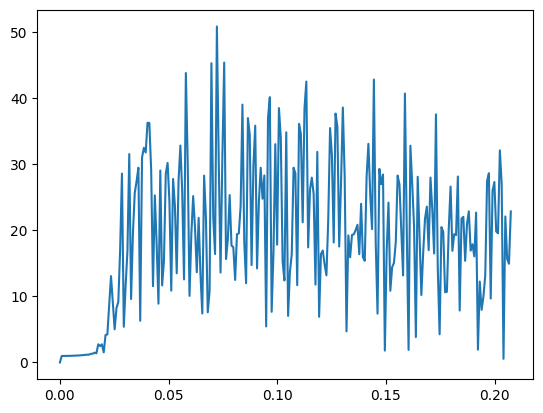

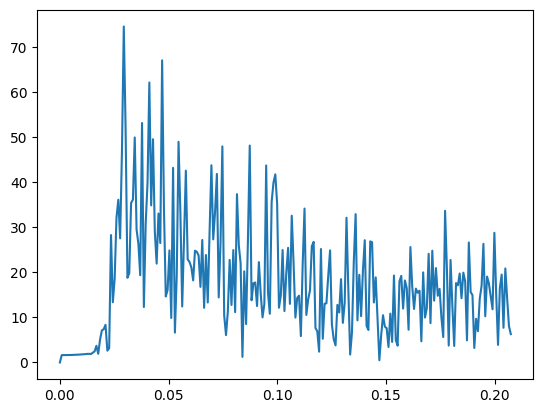

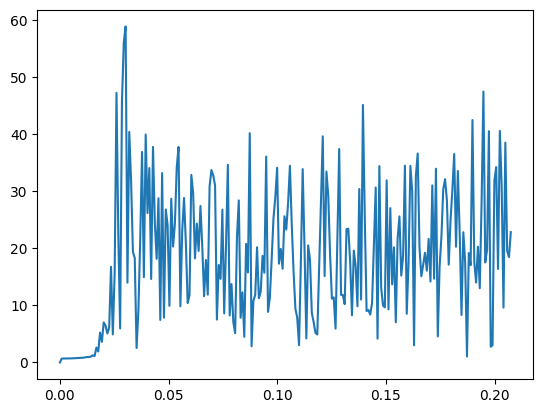

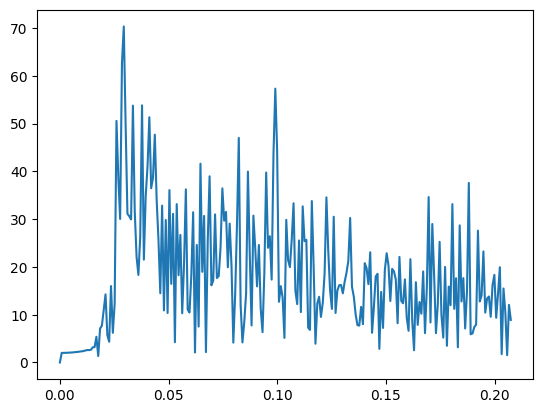

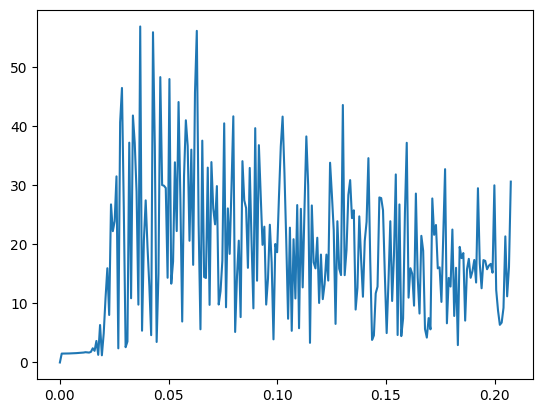

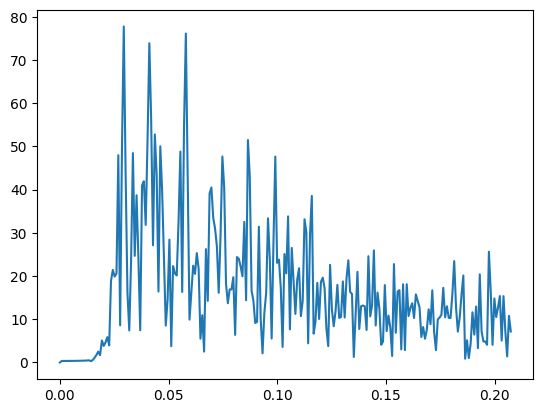

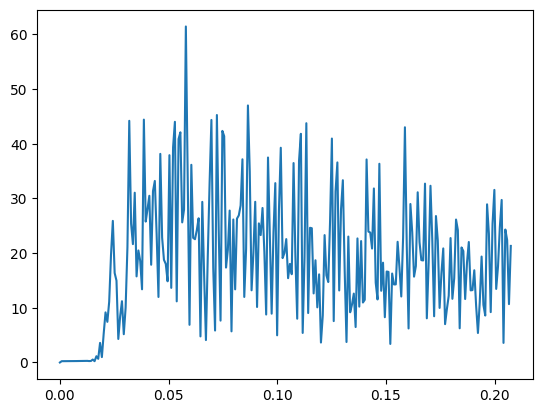

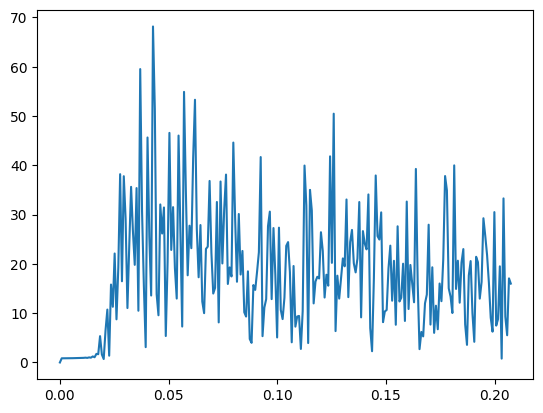

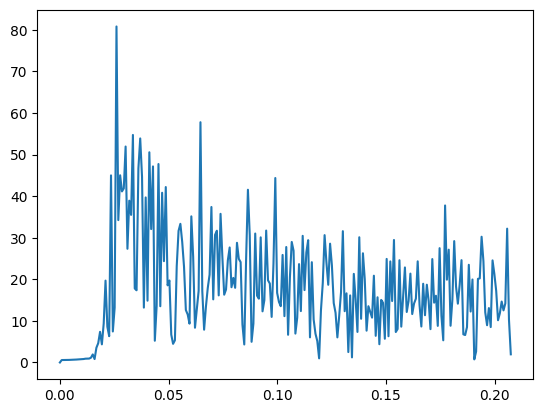

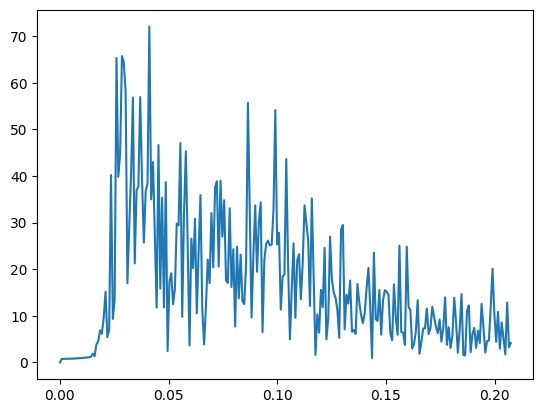

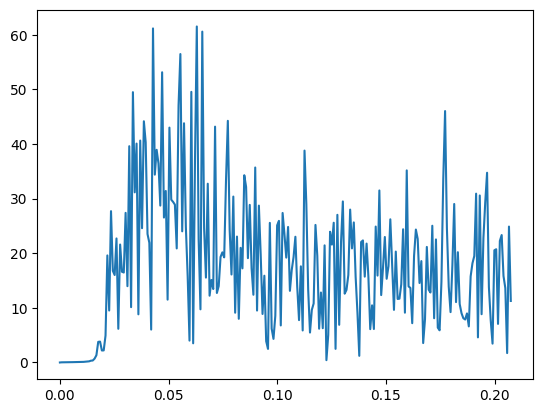

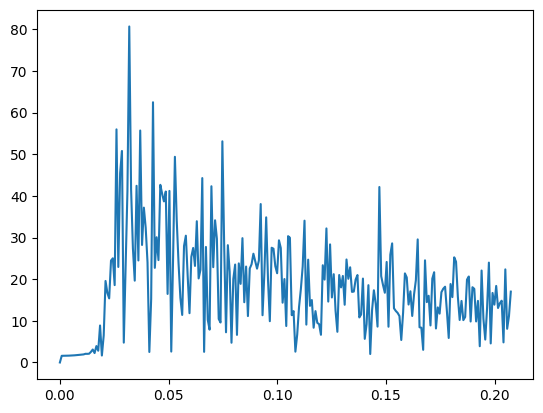

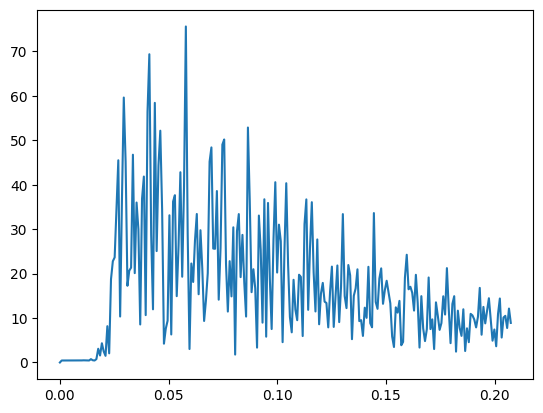

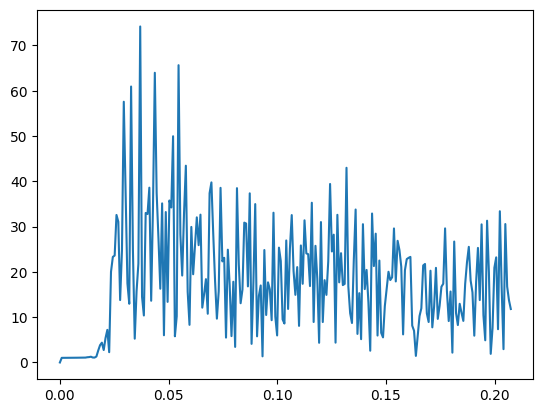

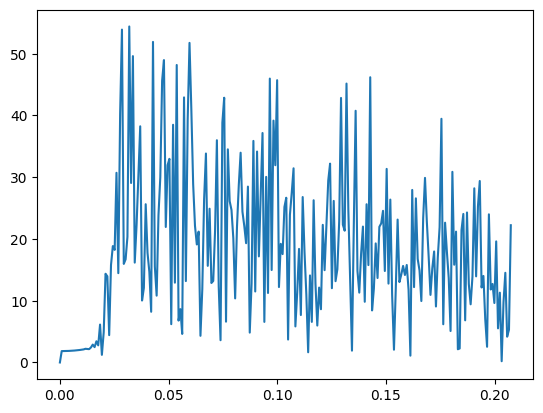

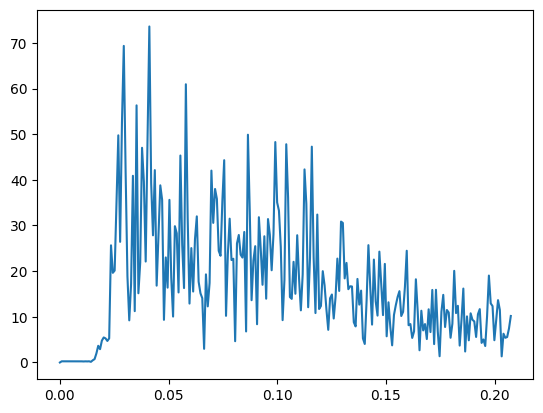

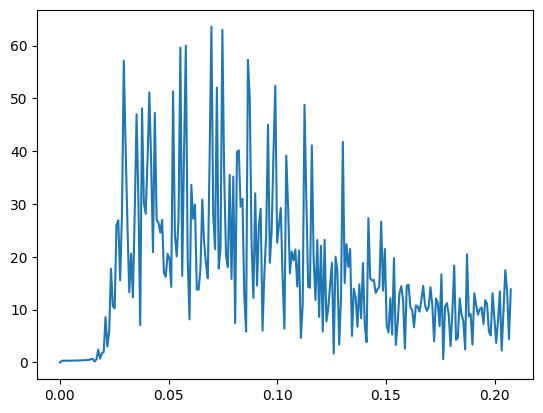

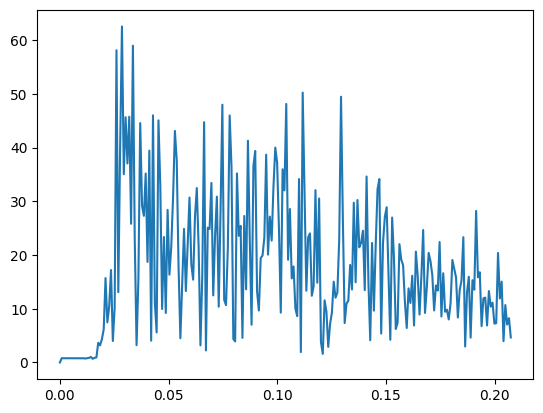

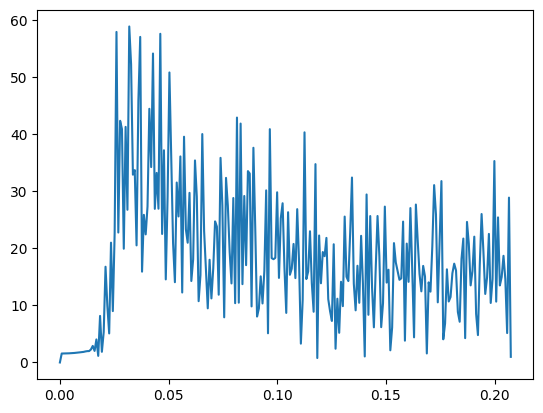

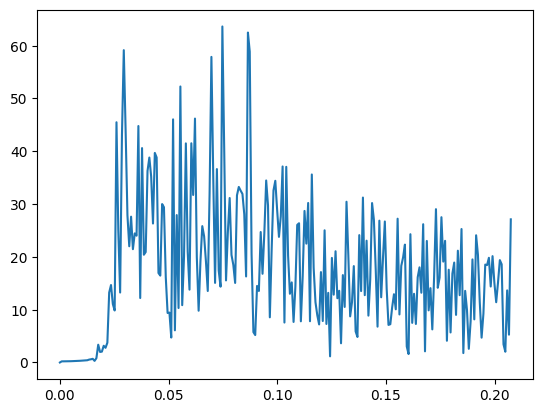

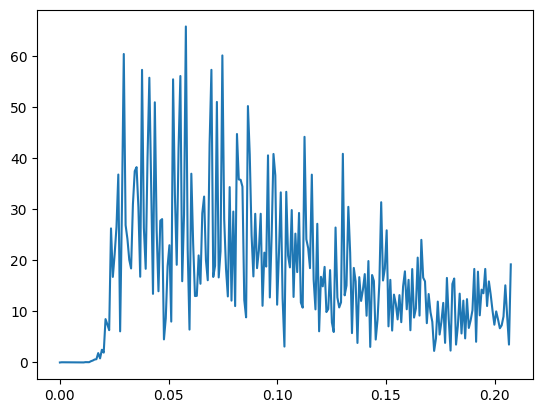

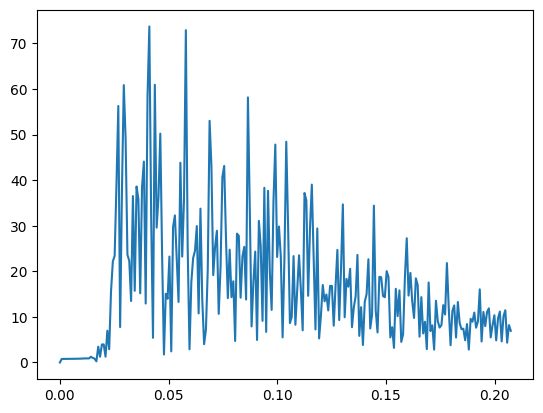

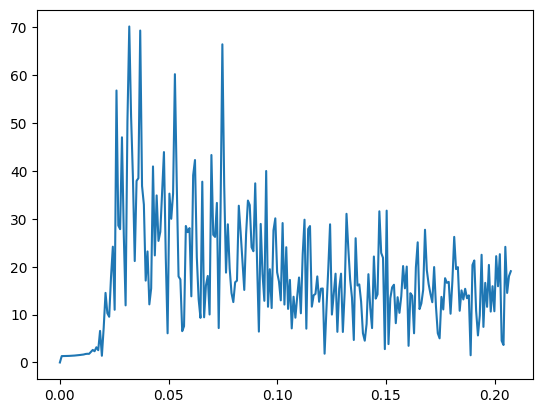

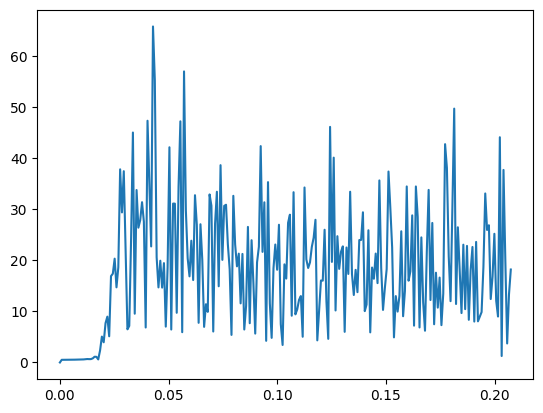

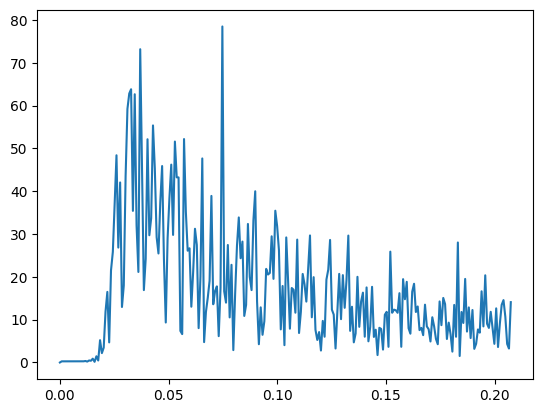

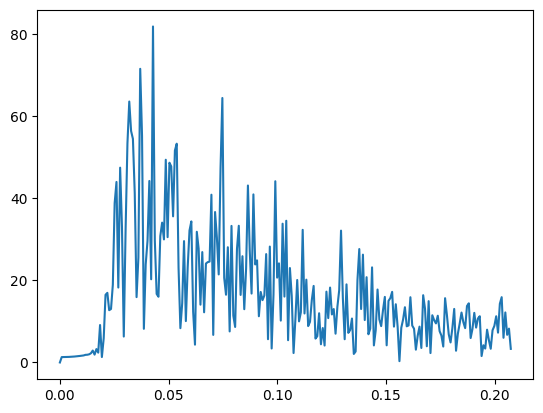

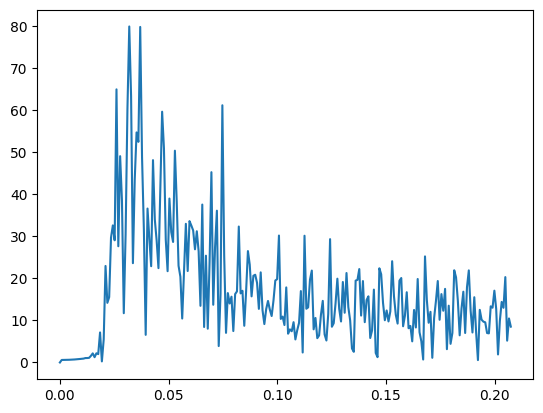

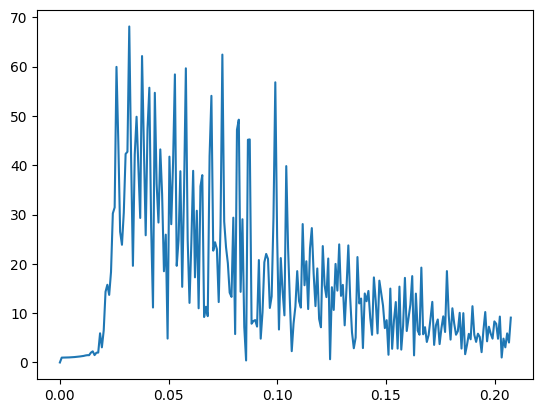

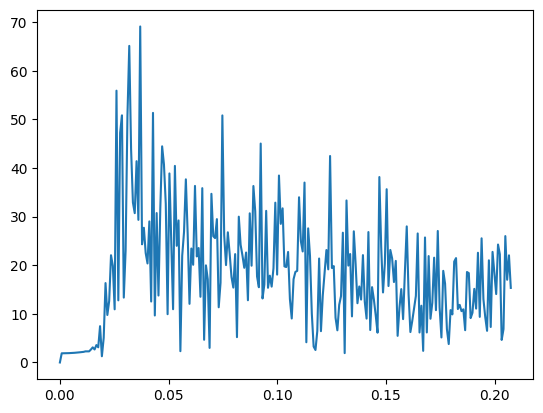

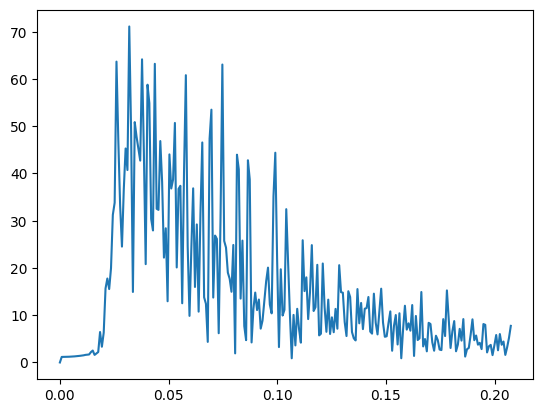

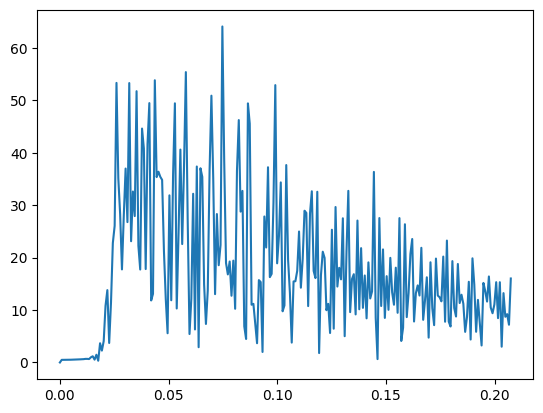

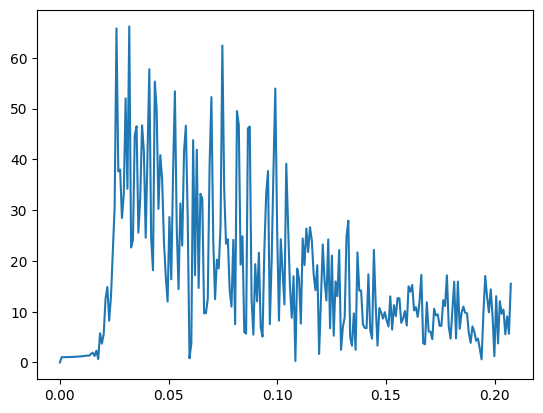

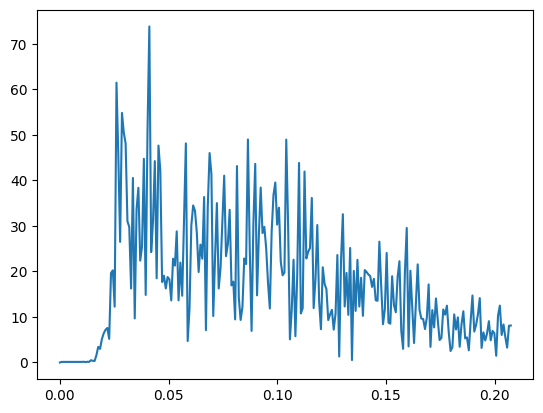

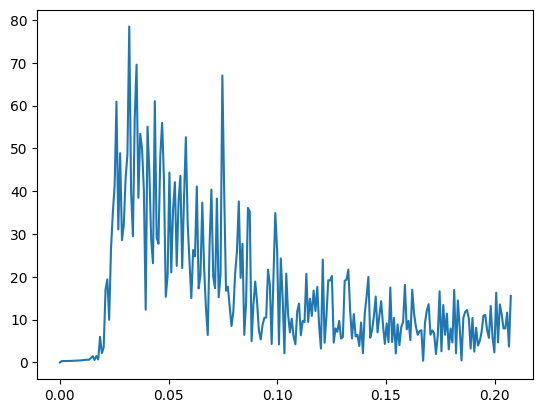

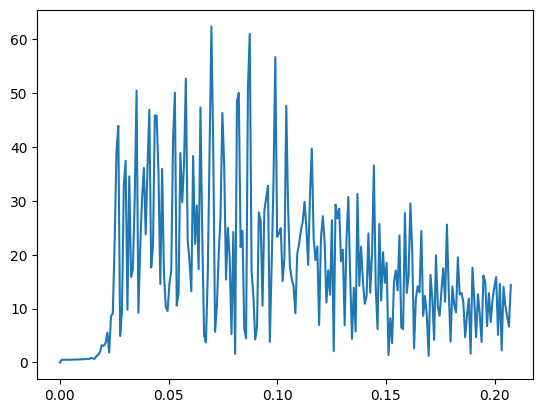

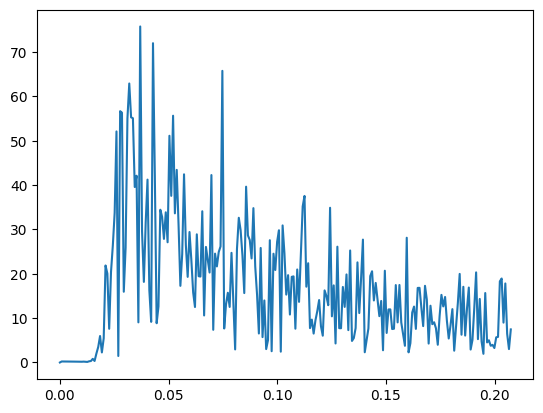

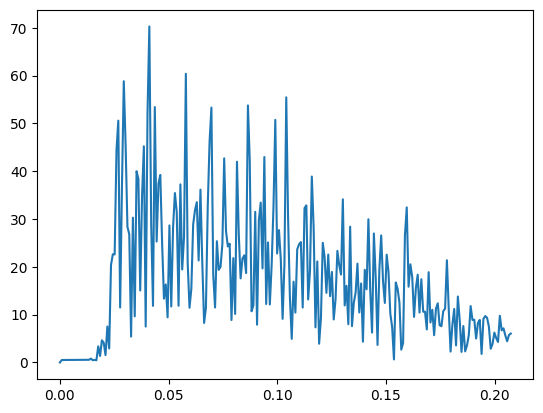

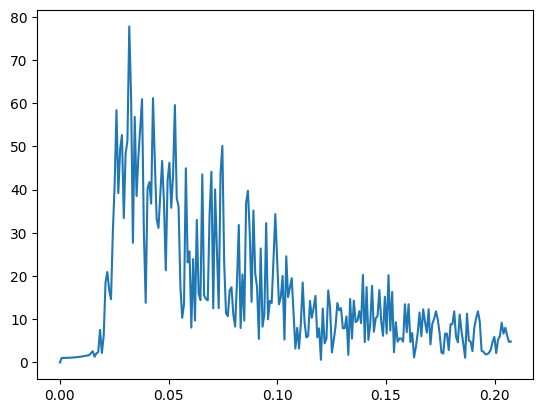

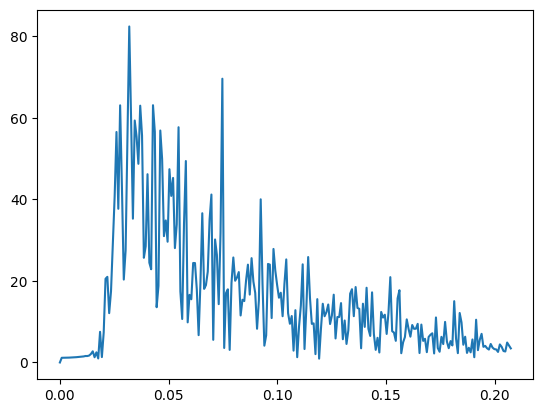

In [ ]:
from numpy.fft import fft, ifft

sr = 500
for i in range(82):
    x = sc.stats.zscore(test[i,:])
    X = fft(x)
    n = X.size
    timestep = 2.4
    freq = np.fft.fftfreq(n, d=timestep)

    plt.plot(freq[:n//2],np.abs(X)[:n//2])
    plt.show()

/tmp/ipykernel_1649380/4250032964.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  freq_band[(0.15 > freq) & (freq > 0.01)] = X[(0.15 > freq) & (freq > 0.01)]
/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/env/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


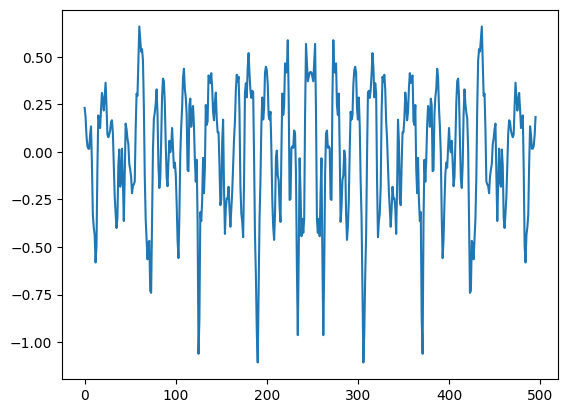

In [ ]:
freq_band = np.zeros(n)
freq_band[(0.15 > freq) & (freq > 0.01)] = X[(0.15 > freq) & (freq > 0.01)]
s = np.fft.ifft(freq_band)
plt.plot(s)

In [ ]:
test = np.load("/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/TimeSeries/sub-almira_ses-20130830_task-rest_space-mni_run-014_desc-smask_timeseries.npy")
test = np.swapaxes(test,0,1)

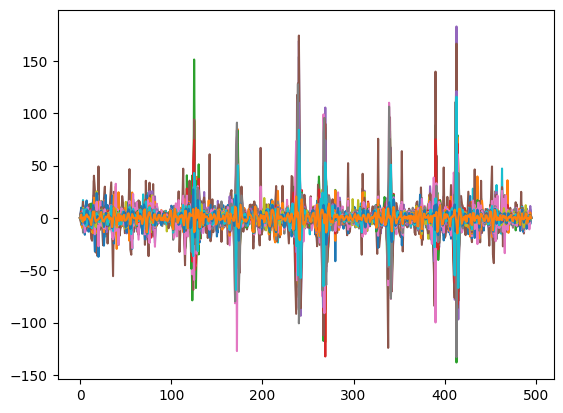

In [ ]:
for i in range(82):
    plt.plot(test[i,:])

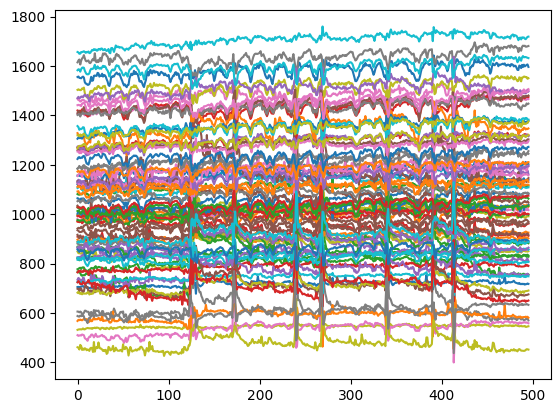

In [ ]:
for i in range(82):
    plt.plot(test[i,:])

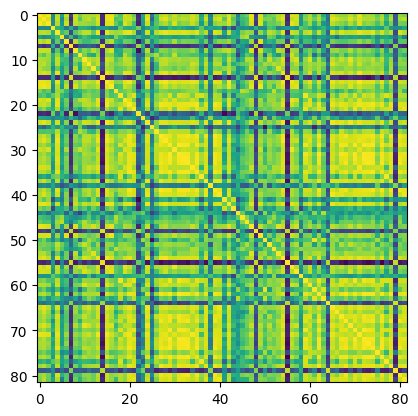

In [ ]:
plt.imshow(C[396*34//39-1,:,:])

In [14]:
test.shape

(496, 82)

In [18]:
test = np.load("/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/TimeSeries/sub-almira_ses-20130830_task-rest_space-mni_run-014_desc-smask_timeseries.npy")
test = np.swapaxes(test,0,1)
C = np.concatenate([np.corrcoef(test[:,i:i+35]).reshape(-1,82,82) for i in range(496-35)])

Saved at /neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/visuals/movieC.mp4


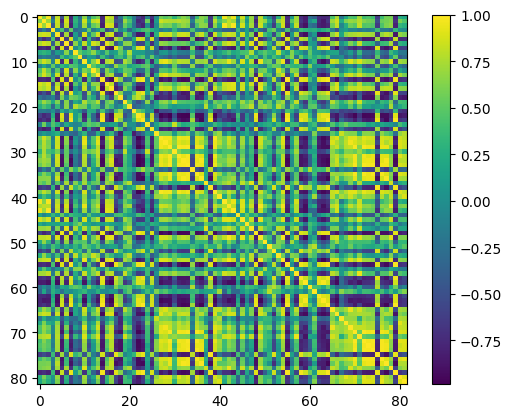

In [21]:
import matplotlib.animation as animation

# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame

ims = []
fig, ax = plt.subplots()
for i in range(396):
    im = ax.imshow(C[i,:,:], animated=True)
    #if i == 0:
    #    ax.imshow(C[i,:,:])  # show an initial one first
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True,
                                repeat_delay=1000)

fig.colorbar(im, ax=ax)

ani.save("/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/visuals/movie{}.mp4".format("dfc_almira_05-08"))
print("Saved at /neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/visuals/movie{}.mp4".format("C"))

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
Saved at /neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/visuals/moviekimiko_0025-05.mp4


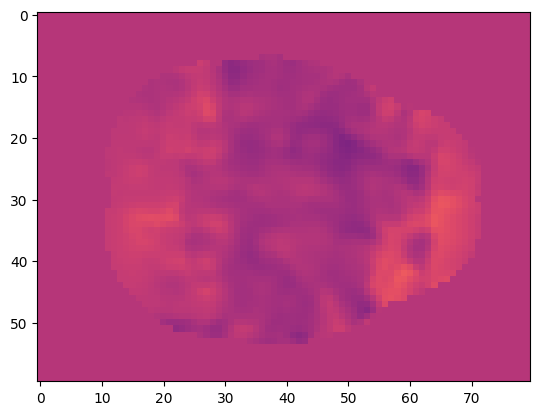

In [22]:
n = 47
rows = n // 5 + 1
columns = 5

test_load = nib.load("/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/TimeSeries/sub-almira_ses-20130830_task-rest_space-mni_run-014_desc-smask_bold.nii.gz").get_fdata()

import matplotlib.animation as animation

# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame

ims = []
fig, axs = plt.subplots(1, 1)
for t in range(496):
    if t % 10 == 0:
        print(t)
    for i in [36]:
        # showing image
        #axs[i,j].title(i)
        #axs[i].axis('off')
        #im = axs[i].imshow(test_load[:,:,i,t],cmap = "bwr",animated = True,vmin=-1, vmax=1)
        im = axs.imshow(test_load[:,:,i,t],cmap = "magma",animated = True, vmin = -2, vmax = 2)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True,
                                repeat_delay=1000)

ani.save("/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/visuals/movie{}.mp4".format("test"))
print("Saved at /neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/visuals/movie{}.mp4".format("kimiko_0025-05"))

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()